In [34]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import onnxruntime as ort

IMG_SIZE = 224

In [35]:

session = ort.InferenceSession("../../ckpt/aenet_complete_output.onnx")
session.set_providers(["CUDAExecutionProvider"])
input_name = session.get_inputs()[0].name

In [36]:
base_path = "../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/"
live_paths = [
    os.path.join(base_path, "4930/live/520891.png"),
    os.path.join(base_path, "4930/live/511717.png"),
    os.path.join(base_path, "4931/live/499439.png"),
    os.path.join(base_path, "4943/live/549726.png"),
    os.path.join(base_path, "4973/live/494955.png"),
]
spoof_paths = [
    os.path.join(base_path, "4930/spoof/495600.png"),
    os.path.join(base_path, "3613/spoof/541354.png"),
    os.path.join(base_path, "4931/spoof/497474.png"),
    os.path.join(base_path, "4943/spoof/494824.png"),
    os.path.join(base_path, "4973/spoof/502204.png"),
]
bbox_lives = [".".join(path.split(".")[:-1]) + "_BB.txt" for path in live_paths]
bbox_spoofs = [
    ".".join(path.split(".")[:-1]) + "_BB.txt" for path in spoof_paths
]

print(live_paths)
print(spoof_paths)
print(bbox_lives)
print(bbox_spoofs)

['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/520891.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/511717.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4931/live/499439.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4943/live/549726.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4973/live/494955.png']
['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/spoof/495600.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/3613/spoof/541354.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4931/spoof/497474.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4943/spoof/494824.png', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4973/spoof/502204.png']
['../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Data/test/4930/live/520891_BB.txt', '../../data/celebA-spoof/CelebA_Spoof_/CelebA_Spoof/Da

In [37]:
live_images = []
spoof_images = []
bb_lives = []
bb_spoofs = []

for live_path, spoof_path, bb_live, bb_spoof in zip(
    live_paths, spoof_paths, bbox_lives, bbox_spoofs
):
    # Load the images
    live_images.append(cv2.imread(live_path))
    spoof_images.append(cv2.imread(spoof_path))

    # Extract bounding boxes
    with open(bb_live, "r") as file:
        bb_lives.append(list(map(int, file.readlines()[0].split()[:-1])))

    with open(bb_spoof, "r") as file:
        bb_spoofs.append(list(map(int, file.readlines()[0].split()[:-1])))

print(live_images[0].shape)
print(spoof_images[0].shape)
print(bb_lives[0])
print(bb_spoofs[0])
bbox_lives = bb_lives
bbox_spoofs = bb_spoofs

(383, 367, 3)
(450, 600, 3)
[52, 43, 95, 124]
[33, 57, 94, 115]


In [38]:
for i in range(len(live_images)):
    # Resize images
    live_images[i] = cv2.resize(live_images[i], (IMG_SIZE, IMG_SIZE))
    spoof_images[i] = cv2.resize(spoof_images[i], (IMG_SIZE, IMG_SIZE))

    # Crop faces and show cropped images
    bbox_live = bbox_lives[i]
    bbox_spoof = bbox_spoofs[i]

    live_images[i] = live_images[i][
        bbox_live[1] : bbox_live[1] + bbox_live[3],
        bbox_live[0] : bbox_live[0] + bbox_live[2],
    ]
    spoof_images[i] = spoof_images[i][
        bbox_spoof[1] : bbox_spoof[1] + bbox_spoof[3],
        bbox_spoof[0] : bbox_spoof[0] + bbox_spoof[2],
    ]

Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image.
On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face.


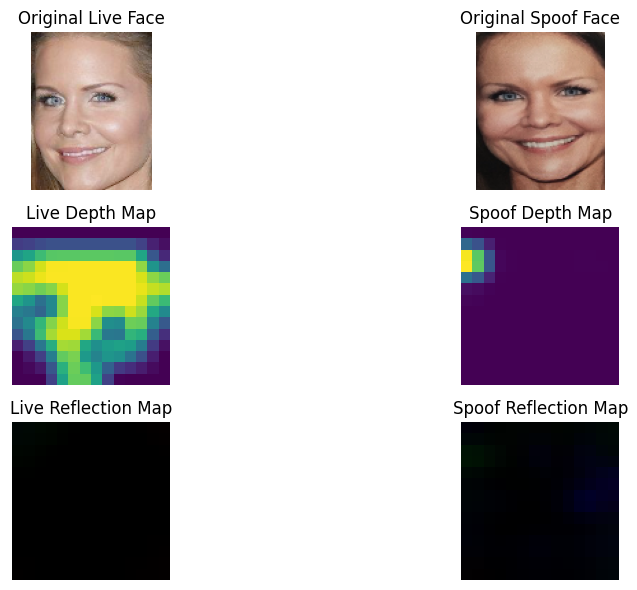

Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image.
On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face.


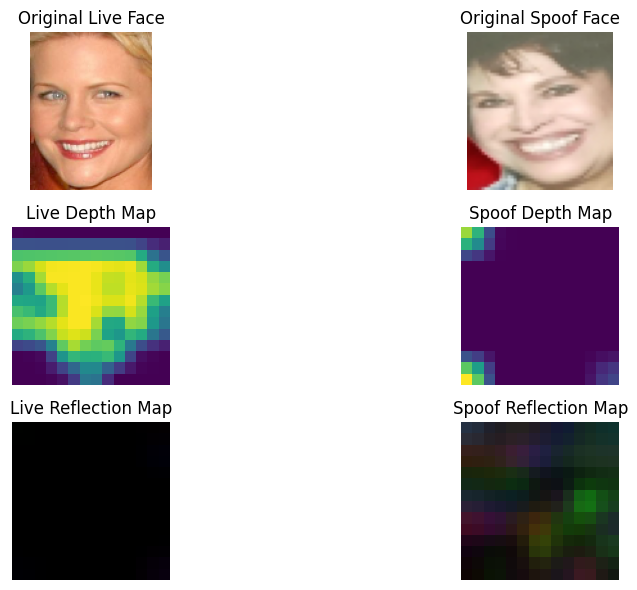

Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image.
On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face.


/tmp/ipykernel_1271539/1462044496.py:54: RuntimeWarning: invalid value encountered in divide
  (spoof_depth_map - np.min(spoof_depth_map))
/tmp/ipykernel_1271539/1462044496.py:61: RuntimeWarning: invalid value encountered in cast
  spoof_depth_map = spoof_depth_map.astype(np.uint8)


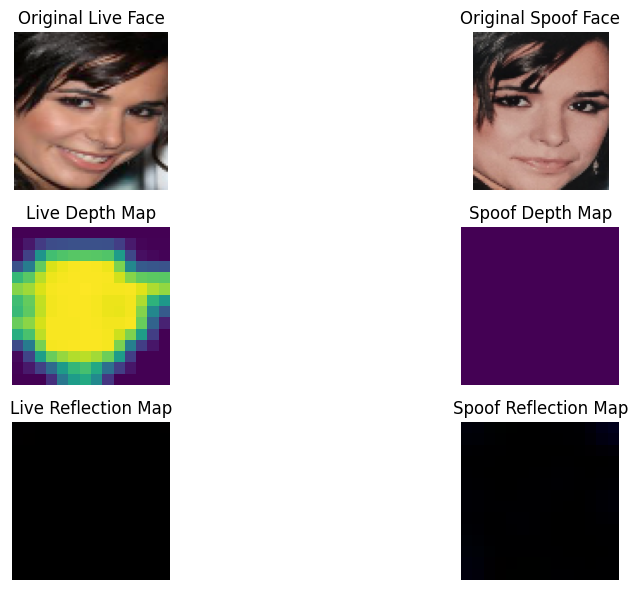

Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image.
On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face.


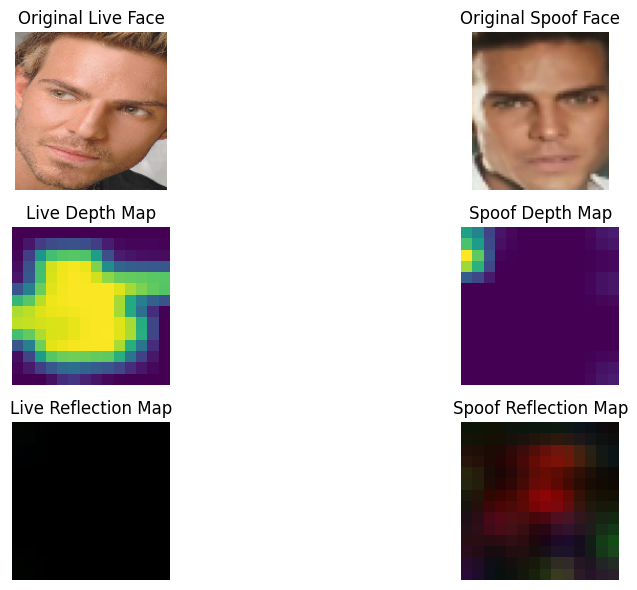

Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image.
On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face.


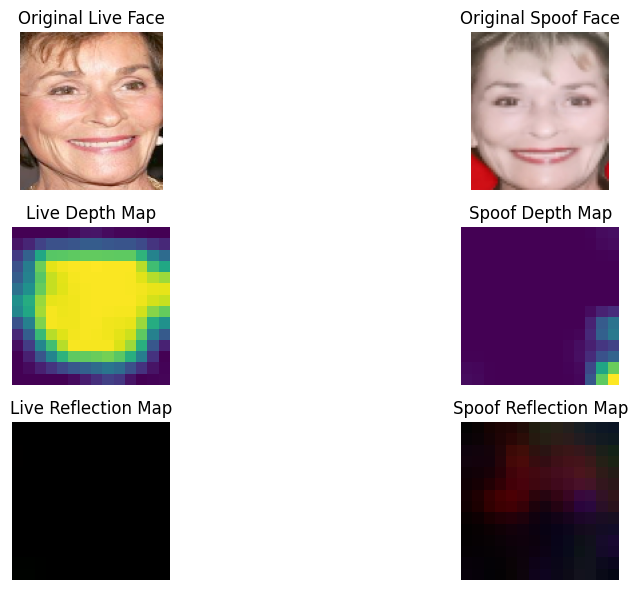

In [41]:
for i in range(len(live_images)):
    # Preprocess the cropped images
    live_image = cv2.resize(live_images[i], (IMG_SIZE, IMG_SIZE))
    spoof_image = cv2.resize(spoof_images[i], (IMG_SIZE, IMG_SIZE))
    cv2.imwrite("Live_Image.png", live_image)
    cv2.imwrite("Spoof_Image.png", spoof_image)
    live_image = cv2.cvtColor(live_image, cv2.COLOR_BGR2RGB)
    spoof_image = cv2.cvtColor(spoof_image, cv2.COLOR_BGR2RGB)

    live_image = live_image.astype(np.float32)
    spoof_image = spoof_image.astype(np.float32)

    # Normalize for torch model and make predictions
    live_image /= 255.0
    spoof_image /= 255.0
    live_image = np.transpose(live_image, (2, 0, 1))
    spoof_image = np.transpose(spoof_image, (2, 0, 1))
    live_image = np.expand_dims(live_image, axis=0)
    spoof_image = np.expand_dims(spoof_image, axis=0)
    result_live = session.run(None, {input_name: live_image.astype(np.float32)})
    result_spoof = session.run(
        None, {input_name: spoof_image.astype(np.float32)}
    )

    (
        x_live,
        live_depth_map,
        reflect_map_live,
        x_live_attribute_live,
        x_attack_live,
        x_light_live,
    ) = result_live
    (
        x_spoof,
        spoof_depth_map,
        reflect_map_spoof,
        x_spoof_attribute_spoof,
        x_attack_spoof,
        x_light_spoof,
    ) = result_spoof

    live_depth_map = np.transpose(live_depth_map[0], (1, 2, 0))
    spoof_depth_map = np.transpose(spoof_depth_map[0], (1, 2, 0))
    reflect_map_live = np.transpose(reflect_map_live[0], (1, 2, 0))
    reflect_map_spoof = np.transpose(reflect_map_spoof[0], (1, 2, 0))

    # Normalize the depth maps
    live_depth_map = (
        (live_depth_map - np.min(live_depth_map))
        / (np.max(live_depth_map) - np.min(live_depth_map))
        * 255.0
    )
    spoof_depth_map = (
        (spoof_depth_map - np.min(spoof_depth_map))
        / (np.max(spoof_depth_map) - np.min(spoof_depth_map))
        * 255.0
    )

    # Convert the masks to uint8
    live_depth_map = live_depth_map.astype(np.uint8)
    spoof_depth_map = spoof_depth_map.astype(np.uint8)

    print(
        "Intuitively, a live face should an 'active' or 'inconstant' depth map, while for the spoof face's it is the opposite, since it is some time a screen photo or a photo of a printed image."
    )
    print(
        "On the other hand, the reflection map should be more 'active' for a spoof face than for a live face, since the spoof face could be a 2D photo or even a person wearing a realistic silicone mask, which is has differnt reflection patterns than a human face."
    )

    # Show the original live and spoof faces
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(live_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Original Live Face")
    plt.axis("off")

    plt.subplot(3, 2, 2)
    plt.imshow(cv2.cvtColor(spoof_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Original Spoof Face")
    plt.axis("off")

    plt.subplot(3, 2, 3)
    plt.imshow(live_depth_map)
    plt.title("Live Depth Map")
    plt.axis("off")

    plt.subplot(3, 2, 4)
    plt.imshow(spoof_depth_map)
    plt.title("Spoof Depth Map")
    plt.axis("off")

    plt.subplot(3, 2, 5)
    plt.imshow(reflect_map_live)
    plt.title("Live Reflection Map")
    plt.axis("off")

    plt.subplot(3, 2, 6)
    plt.imshow(reflect_map_spoof)
    plt.title("Spoof Reflection Map")
    plt.axis("off")

    plt.tight_layout()
    plt.show()